<h1>M. Nielsen, Chapter 6, first cnn model</h1>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import numpy as np
import time
import random
import tensorflow as tf

In [5]:
from matplotlib import pyplot as plt

In [7]:
os.chdir(r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211119\multi_layer")

In [9]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [10]:
###############################################
#    load data from local directory
###############################################

train_x, train_y, val_x, val_y, test_x, test_y = [], [], [], [], [], []

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

for tra in training_data:
    img_tra_x = tra[0].reshape(28,28).tolist()
    img_tra_y = np.array(np.argmax(tra[1]), dtype=np.uint8)
    train_x.append(img_tra_x)
    train_y.append(img_tra_y)
print(np.shape(train_x))

for val in validation_data:
    img_val_x = val[0].reshape(28,28)
#     img_val_y = np.array(np.argmax(val[1]), dtype=np.uint8)
    img_val_y = np.array(val[1], dtype=np.uint8)
    val_x.append(img_val_x)
    val_y.append(img_val_y)
print(np.shape(val_x))

for tes in test_data:
    img_tes_x = tes[0].reshape(28,28)
    img_tes_y = np.array(tes[1], dtype=np.uint8)
    test_x.append(img_tes_x)
    test_y.append(img_tes_y)
print(np.shape(test_x))


train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


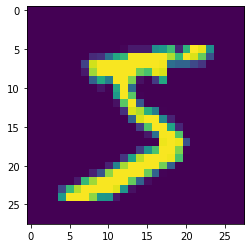

img label: 5


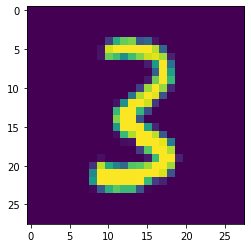

img label: 3


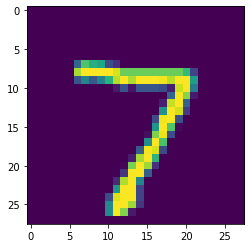

img label: 7


In [11]:
###############################################
#    checking data format:
###############################################
plt.imshow(train_x[0], interpolation='none')
plt.show()
print('img label:', train_y[0])

plt.imshow(val_x[0], interpolation='none')
plt.show()
print('img label:', val_y[0])

plt.imshow(test_x[0], interpolation='none')
plt.show()
print('img label:', test_y[0])


<h1>Trying Implementing the first CNN model as described in M. Nielsen, Chapter 6</h1>	

In [12]:
# first CNN model, M. Nielsen, Chapter 6

# >> net = Network([
#         ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
#                       filter_shape=(20, 1, 5, 5), 
#                       poolsize=(2, 2)),
#         FullyConnectedLayer(n_in=20*12*12, n_out=100),
#         SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
# >>> net.SGD(training_data, 60, mini_batch_size, 0.1, 
#             validation_data, test_data) 

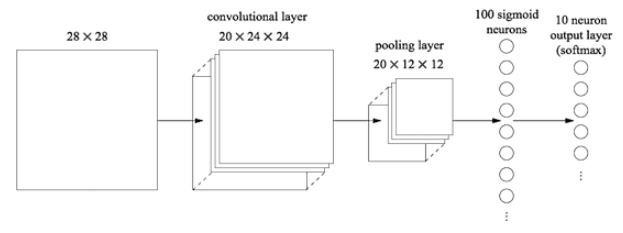

<h1>Reshape data</h1>

In [13]:
# reshape data
train_x = train_x.reshape(np.shape(train_x)[0], np.shape(train_x)[1], np.shape(train_x)[2], 1)
val_x = val_x.reshape(np.shape(val_x)[0], np.shape(val_x)[1], np.shape(val_x)[2], 1)
test_x = test_x.reshape(np.shape(test_x)[0], np.shape(test_x)[1], np.shape(test_x)[2], 1)

train_y = tf.one_hot(train_y.astype(np.int32), depth=10)
val_y = tf.one_hot(val_y.astype(np.int32), depth=10)
test_y = tf.one_hot(test_y.astype(np.int32), depth=10)

<h1>Build Network model</h1>

In [14]:
################################################################
#   first CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
################################################################

################################################################
# construct netwoek model

input_shape = (28, 28, 1)

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.sigmoid,
        input_shape=input_shape
    )
)

model.add(
    tf.keras.layers.MaxPool2D(
        strides=(2,2)
    )
)

model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        100,
        activation=tf.nn.sigmoid,
        kernel_initializer=tf.keras.initializers.RandomNormal(
            stddev=1.0),
        bias_initializer=tf.keras.initializers.RandomNormal(
            stddev=1.0)
    )
)

model.add(
    tf.keras.layers.Dense(
        10,
        activation=tf.nn.softmax,
    )
)
################################################################

################################################################
# compile model
n_eph = 60
eta = 0.1
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               288100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
_________________________________________________________________


<h1>Train Network</h1>

In [15]:
################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211122\simple_sgd_model'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################

################################################################
#    train model
batch_size = 10
n_eph = 60


history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
# ################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)
################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


Epoch 1/60
5000/5000 [==============================] - 22s 4ms/step - loss: 0.5982 - accuracy: 0.8116 - val_loss: 0.3056 - val_accuracy: 0.9075
Epoch 2/60
5000/5000 [==============================] - 24s 5ms/step - loss: 0.2862 - accuracy: 0.9133 - val_loss: 0.2081 - val_accuracy: 0.9383
Epoch 3/60
5000/5000 [==============================] - 25s 5ms/step - loss: 0.2197 - accuracy: 0.9322 - val_loss: 0.1881 - val_accuracy: 0.9440
Epoch 4/60
5000/5000 [==============================] - 24s 5ms/step - loss: 0.1790 - accuracy: 0.9457 - val_loss: 0.1686 - val_accuracy: 0.9511
Epoch 5/60
5000/5000 [==============================] - 35s 7ms/step - loss: 0.1538 - accuracy: 0.9521 - val_loss: 0.1418 - val_accuracy: 0.9586
Epoch 6/60
5000/5000 [==============================] - 37s 7ms/step - loss: 0.1343 - accuracy: 0.9577 - val_loss: 0.1285 - val_accuracy: 0.9615
Epoch 7/60
5000/5000 [==============================] - 40s 8ms/step - loss: 0.1202 - accuracy: 0.9624 - val_loss: 0.1227 - val_ac

5000/5000 [==============================] - 41s 8ms/step - loss: 0.0048 - accuracy: 0.9997 - val_loss: 0.0876 - val_accuracy: 0.9792
Epoch 58/60
5000/5000 [==============================] - 41s 8ms/step - loss: 0.0046 - accuracy: 0.9997 - val_loss: 0.0857 - val_accuracy: 0.9796
Epoch 59/60
5000/5000 [==============================] - 41s 8ms/step - loss: 0.0044 - accuracy: 0.9998 - val_loss: 0.0876 - val_accuracy: 0.9796
Epoch 60/60
1/1 [==============================] - 1s 817ms/step - loss: 0.0857 - accuracy: 0.9752


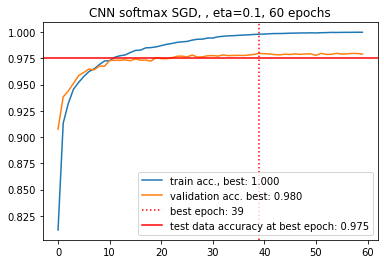

In [16]:
plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN softmax SGD, , eta={}, {} epochs'.format(eta, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

from winsound import Beep
Beep(1000, 100)

In [18]:
print(acc)

[0.8115800023078918, 0.9132999777793884, 0.932200014591217, 0.9456599950790405, 0.9520999789237976, 0.9577000141143799, 0.9623799920082092, 0.9649800062179565, 0.968940019607544, 0.9724400043487549, 0.9727399945259094, 0.9760000109672546, 0.977400004863739, 0.9781799912452698, 0.980459988117218, 0.982479989528656, 0.9828000068664551, 0.9849200248718262, 0.9851800203323364, 0.9858599901199341, 0.987060010433197, 0.9882400035858154, 0.9890400171279907, 0.990119993686676, 0.9906600117683411, 0.9910399913787842, 0.9922999739646912, 0.993120014667511, 0.9932199716567993, 0.9942600131034851, 0.9943199753761292, 0.9954400062561035, 0.995959997177124, 0.9963600039482117, 0.9965400099754333, 0.9968799948692322, 0.9971200227737427, 0.9973800182342529, 0.9977200031280518, 0.997979998588562, 0.9980199933052063, 0.9983800053596497, 0.9985600113868713, 0.9986000061035156, 0.9987000226974487, 0.9989200234413147, 0.998960018157959, 0.9991199970245361, 0.9991199970245361, 0.999239981174469, 0.999119997

In [20]:
print(loss)

[0.5981639623641968, 0.2861895263195038, 0.2196563482284546, 0.17901095747947693, 0.1537645161151886, 0.1343453973531723, 0.12015356123447418, 0.10932999849319458, 0.09996028989553452, 0.09068866819143295, 0.08525910973548889, 0.0769651010632515, 0.07211502641439438, 0.06830699741840363, 0.062238484621047974, 0.057797208428382874, 0.05444835498929024, 0.05032452940940857, 0.04711054265499115, 0.04437269642949104, 0.041524600237607956, 0.03883529454469681, 0.03632204607129097, 0.033196255564689636, 0.03161441907286644, 0.029955986887216568, 0.02786843292415142, 0.025685610249638557, 0.024126853793859482, 0.022224441170692444, 0.021068112924695015, 0.01922357641160488, 0.01815931312739849, 0.016911711543798447, 0.015849679708480835, 0.014991642907261848, 0.014145643450319767, 0.013348113745450974, 0.01227543968707323, 0.011723985895514488, 0.011225180700421333, 0.010257504880428314, 0.009661137126386166, 0.009195295162498951, 0.008832694962620735, 0.008358563296496868, 0.0078419065102934

In [22]:
print(val_acc)

[0.9075000286102295, 0.9383000135421753, 0.9440000057220459, 0.9510999917984009, 0.9585999846458435, 0.9614999890327454, 0.9648000001907349, 0.9639999866485596, 0.9675999879837036, 0.9674000144004822, 0.9728999733924866, 0.9731000065803528, 0.9731000065803528, 0.9735000133514404, 0.9726999998092651, 0.974399983882904, 0.9732000231742859, 0.9732999801635742, 0.9722999930381775, 0.975600004196167, 0.9746999740600586, 0.9746000170707703, 0.9753000140190125, 0.9768999814987183, 0.9771000146865845, 0.9763000011444092, 0.9781000018119812, 0.9761999845504761, 0.9764000177383423, 0.977400004863739, 0.9775999784469604, 0.9771000146865845, 0.9782000184059143, 0.9775000214576721, 0.9776999950408936, 0.9778000116348267, 0.9776999950408936, 0.9781000018119812, 0.9786999821662903, 0.9797000288963318, 0.9793000221252441, 0.9790999889373779, 0.9785000085830688, 0.9782999753952026, 0.9789000153541565, 0.978600025177002, 0.979200005531311, 0.9786999821662903, 0.979200005531311, 0.979200005531311, 0.9778

In [23]:
print(val_loss)

[0.305550754070282, 0.20807631313800812, 0.18813537061214447, 0.16863670945167542, 0.14184804260730743, 0.1284739375114441, 0.12269938737154007, 0.11454606056213379, 0.10573704540729523, 0.10777655988931656, 0.09601835161447525, 0.09269879758358002, 0.09049137681722641, 0.09091238677501678, 0.09699825197458267, 0.0917804166674614, 0.09065579622983932, 0.09280799329280853, 0.09207771718502045, 0.08632201701402664, 0.08828941732645035, 0.08574197441339493, 0.0827757716178894, 0.08636700361967087, 0.08010490983724594, 0.08552401512861252, 0.0798519030213356, 0.08594176918268204, 0.08212419599294662, 0.08141721785068512, 0.08031533658504486, 0.08187888562679291, 0.08254089951515198, 0.08113671839237213, 0.08206738531589508, 0.08351466059684753, 0.0845630019903183, 0.08290991932153702, 0.08171135932207108, 0.08276165276765823, 0.08230327814817429, 0.08298635482788086, 0.08453995734453201, 0.0838572159409523, 0.08547667413949966, 0.08461906015872955, 0.08529186993837357, 0.08722654730081558,